# Clasificación - KNN

In [1]:
# Importo librerías
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs

from mglearn.plots import plot_2d_separator 

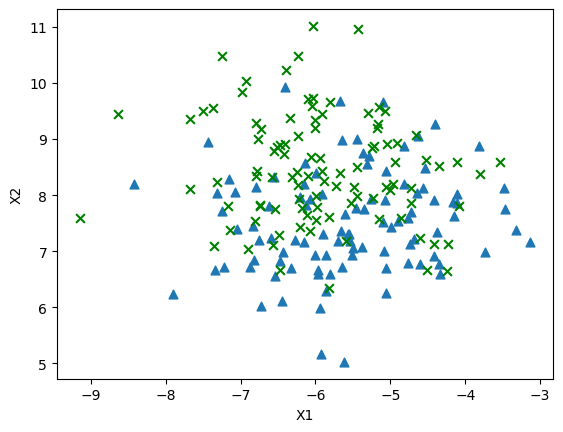

In [3]:
# Genero un dataset sintético
X, y = make_blobs(centers=2, random_state=5, n_samples=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Clase Y=0", marker="^")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Clase Y=1", c="green", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [4]:
# Divido el dataset en Train + Test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    stratify=y, 
                                                    random_state=5)

Probamos con un único vecino (modelo sobreajustado)

In [5]:
# Ajusto un modelo KNN
clf = KNeighborsClassifier(n_neighbors=1)

In [6]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

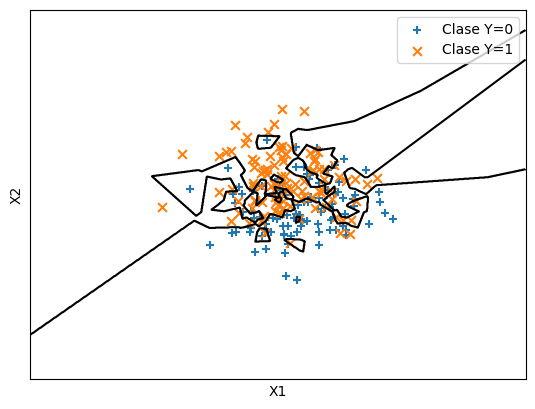

In [7]:
# Represento las fronteras de decisión
plt.scatter(X[y == 0,0], X[y == 0,1], s=40, label="Clase Y=0", marker="+")
plt.scatter(X[y == 1,0], X[y == 1,1], s=40, label="Clase Y=1", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plot_2d_separator(clf, X)
plt.show()

In [8]:
print('- Accuracy media en el conjunto de train: {}'.format(clf.score(X_train, y_train)))
print('- Accuracy media en el conjunto de test: {}'.format(clf.score(X_test, y_test)))

- Accuracy media en el conjunto de train: 1.0
- Accuracy media en el conjunto de test: 0.575


In [9]:
y_test_pred = clf.predict(X_test)

In [10]:
# Obtengo métricas
print("- Precision:", round(precision_score(y_test, y_test_pred),2))
print("- Recall:", recall_score(y_test, y_test_pred))
print("- Fscore:", round(f1_score(y_test, y_test_pred),2))
print("- Accuracy:", round(accuracy_score(y_test, y_test_pred),2))

- Precision: 0.57
- Recall: 0.6
- Fscore: 0.59
- Accuracy: 0.57


In [11]:
confusion_matrix(y_test, y_test_pred)

array([[11,  9],
       [ 8, 12]], dtype=int64)

<Axes: >

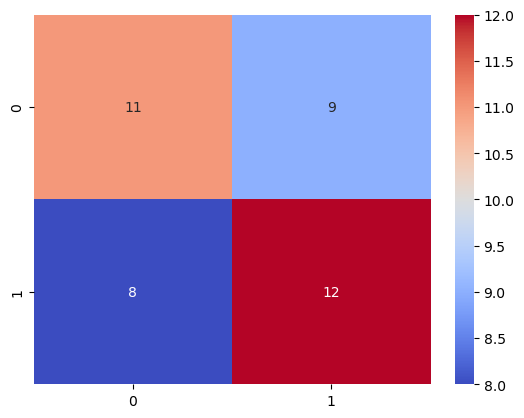

In [15]:
sns.heatmap(confusion_matrix(y_test, y_test_pred),
            annot=True, 
            cmap = "coolwarm")

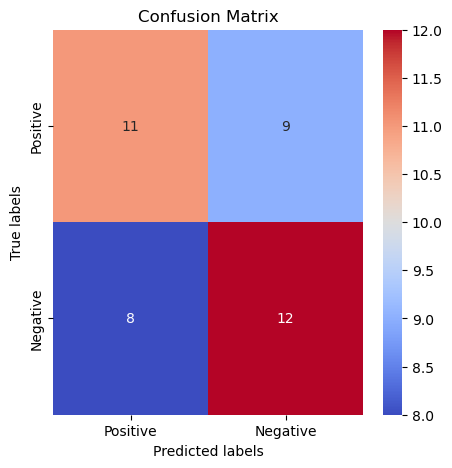

In [16]:
plt.figure(figsize=(5,5))

ax = sns.heatmap(
            confusion_matrix(y_test, y_test_pred), 
            annot = True, 
            cmap = "coolwarm",
            xticklabels = ['Positive', 'Negative'], 
            yticklabels = ['Positive', 'Negative']
                )

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

# https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

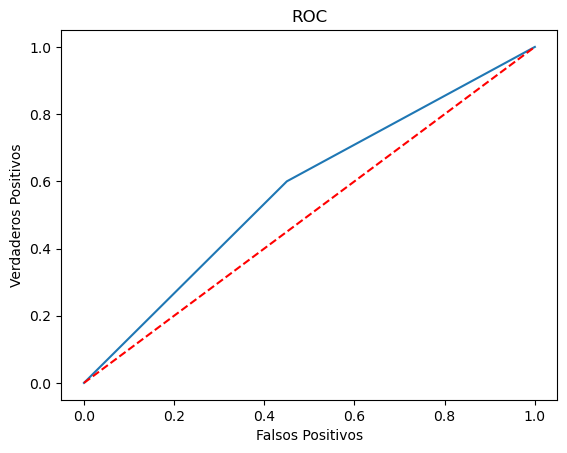

In [14]:
y_pred_prob = clf.predict_proba(X_test)
y_pred_prob[:4]

fpr, tpr, thrs = roc_curve(y_test, y_pred_prob[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.title("ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.show()

## Ejercicio

Mejora los resultados para obtener métricas sin overfitting con GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
params = {
    "n_neighbors" : range(2,20),
    "weights"     : ["uniform", "distance"],
    "metric"      : ["cityblock", "minkowski"]
}

In [19]:
knn = KNeighborsClassifier()

In [20]:
grid_knn = GridSearchCV(knn, param_grid=params, cv = 3)

In [21]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['cityblock', 'minkowski'],
                         'n_neighbors': range(2, 20),
                         'weights': ['uniform', 'distance']})

In [23]:
grid_knn.best_estimator_

KNeighborsClassifier(metric='cityblock', n_neighbors=16)

In [24]:
grid_knn.best_params_

{'metric': 'cityblock', 'n_neighbors': 16, 'weights': 'uniform'}

In [22]:
y_pred_grid = grid_knn.predict(X_test)

In [25]:
print("Accuracy ----> ", accuracy_score(y_test, y_pred_grid))
print("F1 Score ----> ", f1_score(y_test, y_pred_grid))
print("Precission --> ", precision_score(y_test, y_pred_grid))
print("Recall   ----> ", recall_score(y_test, y_pred_grid))

Accuracy ---->  0.7
F1 Score ---->  0.6666666666666665
Precission -->  0.75
Recall   ---->  0.6


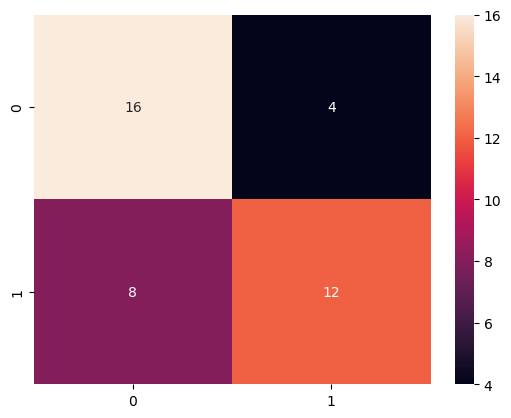

In [27]:
sns.heatmap(confusion_matrix(y_test, y_pred_grid), annot=True)
plt.show()

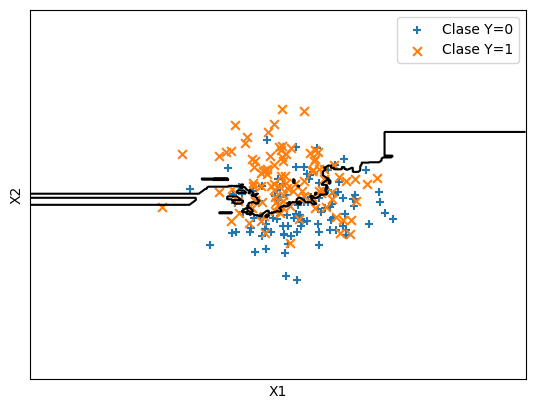

In [28]:
# Represento las fronteras de decisión
plt.scatter(X[y == 0,0], X[y == 0,1], s=40, label="Clase Y=0", marker="+")
plt.scatter(X[y == 1,0], X[y == 1,1], s=40, label="Clase Y=1", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()a
plot_2d_separator(grid_knn, X)
plt.show()

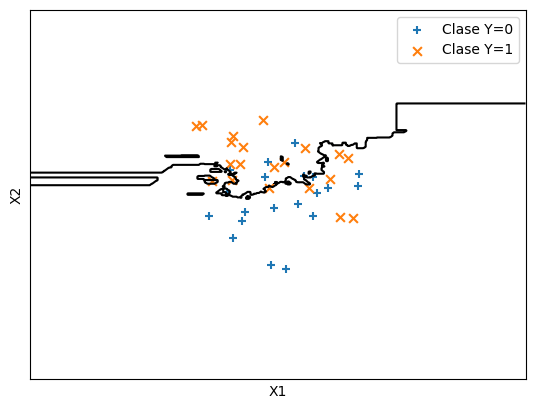

In [30]:
# Represento las fronteras de decisión
plt.scatter(X_test[y_test == 0,0], X_test[y_test == 0,1], s=40, label="Clase Y=0", marker="+")
plt.scatter(X_test[y_test == 1,0], X_test[y_test == 1,1], s=40, label="Clase Y=1", marker="x")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plot_2d_separator(grid_knn, X_test)
plt.show()